# Tarea 4: Zona habitable

Alejandro Restrepo Giraldo  CC: 1001389709



Se utiliza el modelo descrito en http://phl.upr.edu/library/notes/habitablezonesdistancehzdahabitabilitymetricforexoplanets el cual calcula las distancias interiror y exteriror de la zona habitable como

$$r_i = [r_{is} - a_i(T_{eff}-T_s) - b_i(T_{eff}-T_s)^2 ]\sqrt{L}$$
$$r_o = [r_{os} - a_o(T_{eff}-T_s) - b_o(T_{eff}-T_s)^2 ]\sqrt{L}$$

En donde $L$ es la luminosidad medida en luminosidades solares, $T_s$ es la temperatura del sol, $T_eff$ es la temperatura efectiva de la estrella, es decir, la temperatura de un cuerpo negro que emite un espectro similar y las constantes son

$$r_{is} = 0.72$$
$$r_{os} = 1.77$$
$$a_i = 2.7619 \times 10^{-5}$$
$$ao = 1.3786 \times10^{-4}$$
$$bi = 3.8095 \times10^{-9}$$
$$bo = 1.4286 \times10^{-9}$$

Luego, construye una métrica $HZD$ (habitable zone distance) con unidades $HZU$ (habitable zone units) para la zona habitable de cada sistema de la manera

$$HZD = \frac{2r-r_o-r_i}{r_o-r_i}$$

Si $-1<$ $HZD $ $< 1$ el planeta se encuentra en la zona habitable de su estrella.

In [197]:
# Librerías
import numpy as np
import pandas as pd

In [198]:
# Se cargan los datos
data = pd.read_csv("exoplanets.csv")
#print(data)

/home/usuario/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [199]:
# Se filtran las columnas de interés

NAME = data['NAME']          # Nombre del planeta
TEFF = data['TEFF']          # Temperatura efectiva
MASS = data['MASS']          # Masa del planeta
A = data['A']                # Semieje mayor
DENSITY = data['DENSITY']    # Densidad del planeta
R = data['R']                # Radio del planeta
STAR = data['STAR']          # Nombre de la estrella
MSTAR = data['MSTAR']        # Masa de la estrella
RSTAR = data['RSTAR']        # Radio de la estrella
BINARY = data['BINARY']      # Sistema binario

#print(MASS)
#print(R)

In [200]:
# Función para cambiar la masa medida en masas de jupiter a masas de la tierra
def ToEarthMass(a):
    return a*317.907

# Cambio de unidades de medida de la masa
MASSE = MASS.pipe(ToEarthMass)
#print(MASSE)

# Función para cambiar el radio medido en radio de jupiter a radio de la tierra
def ToEarthRadius(a):
    return a*11.2089

# Cambio de unidades de medida del radio
RE = R.pipe(ToEarthRadius)
#print(RE)

In [201]:
# DataFrame
frame = { "NAME": NAME, "TEFF": TEFF, "MASS": MASS, "MASSE": MASSE, "A": A, "DENSITY":DENSITY, "R":R,"RE":RE ," STAR": STAR, "MSTAR": MSTAR, "RSTAR": RSTAR,"BINARY":BINARY }
datos1 = pd.DataFrame(frame) 

#print(datos1)

In [202]:
# Se descartan los datos con Binario = 1 y NaN
datos = datos1.query("BINARY == 0 or BINARY == 'NaN'" )
#print(datos)


#i = datos[datos['NAME']=='Kepler-22 b']
#print(i)

In [203]:
# Función de cálculo de luminosidad
def Lumin(R,T):
    
    # Constante de Stefan-Boltzmann
    sigma = 5.670367*10**(-8)
    
    # Valor de conversión de radios solares a metros
    convers = 6.95700*10**8
    
    return 4*np.pi*R**2*sigma*T**4*convers**2

# Se crea otra columna del DataFrame para la luminosidad de la estrella
datos["LUM"] = Lumin(RSTAR,TEFF)
# Se crea columna de luminosidad en unidades de luminosidad solar
datos["LUMS"] = datos["LUM"]/(3.827*10**26)
print(datos)

               NAME    TEFF      MASS       MASSE         A  DENSITY  \
0      Kepler-107 d  5851.0  0.003712    1.180179  0.078010      NaN   
1     Kepler-1049 b  3864.0  0.002453    0.779854  0.034472      NaN   
2      Kepler-813 b  5743.0  0.015970    5.076879  0.137610      NaN   
3      Kepler-427 b  5800.0  0.290000   92.193030  0.091351     0.16   
4     Kepler-1056 b  6127.0  0.027126    8.623577  0.185149      NaN   
...             ...     ...       ...         ...       ...      ...   
5742    KOI 7978.01  6297.0  0.012544    3.987903  0.082100      NaN   
5743    KOI 7982.01  6231.0  0.033310   10.589346  1.028700      NaN   
5744    KOI 8193.01  5570.0  0.045399   14.432589  0.995500      NaN   
5745    KOI 7986.01  6119.0  0.000983    0.312479  0.029000      NaN   
5746    KOI 7988.01  4989.0  1.000000  317.907000  1.223300      NaN   

             R         RE         STAR  MSTAR  RSTAR  BINARY           LUM  \
0     0.095459   1.069990   Kepler-107    NaN  1.411     

/home/usuario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/usuario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [204]:
# Se calculan los límites r_i y r_o

# Constantes del modelo
ris = 0.72
ros = 1.77
ai = 2.7619*10**(-5)
ao = 1.3786*10**(-4)
bi = 3.8095*10**(-9)
bo = 1.4286*10**(-9)
Ts = 5780

# Límites
datos["ri"] = (ris - ai*(datos["TEFF"] - Ts) - bi*(datos["TEFF"] - Ts)**2 )*np.sqrt(datos["LUMS"])
datos["ro"] = (ros - ao*(datos["TEFF"] - Ts) - bo*(datos["TEFF"] - Ts)**2 )*np.sqrt(datos["LUMS"])

print(datos)


               NAME    TEFF      MASS       MASSE         A  DENSITY  \
0      Kepler-107 d  5851.0  0.003712    1.180179  0.078010      NaN   
1     Kepler-1049 b  3864.0  0.002453    0.779854  0.034472      NaN   
2      Kepler-813 b  5743.0  0.015970    5.076879  0.137610      NaN   
3      Kepler-427 b  5800.0  0.290000   92.193030  0.091351     0.16   
4     Kepler-1056 b  6127.0  0.027126    8.623577  0.185149      NaN   
...             ...     ...       ...         ...       ...      ...   
5742    KOI 7978.01  6297.0  0.012544    3.987903  0.082100      NaN   
5743    KOI 7982.01  6231.0  0.033310   10.589346  1.028700      NaN   
5744    KOI 8193.01  5570.0  0.045399   14.432589  0.995500      NaN   
5745    KOI 7986.01  6119.0  0.000983    0.312479  0.029000      NaN   
5746    KOI 7988.01  4989.0  1.000000  317.907000  1.223300      NaN   

             R         RE         STAR  MSTAR  RSTAR  BINARY           LUM  \
0     0.095459   1.069990   Kepler-107    NaN  1.411     

/home/usuario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/usuario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [205]:
# Se descartan los datos con Binario = 1 y NaN
datos = datos.query("DENSITY >= 5" )
#print(datos)

In [206]:
# Se calcula la distancia de la zona de habitable (HDZ)
datos["HZD"] = (2*datos["A"] - datos["ro"] - datos["ri"])/(datos["ro"] - datos["ri"])

print(datos)

              NAME    TEFF       MASS        MASSE         A    DENSITY  \
26       HD 3167 b  5261.0   0.015891     5.051860  0.018149    5.60000   
174      WASP-18 b  6400.0  10.200600  3242.842144  0.020140   10.28090   
318   Kepler-113 b  4725.0   0.013404     4.261225  0.050274   10.73000   
429      HAT-P-2 b  6290.0   8.870660  2820.044909  0.067909    7.29000   
476    HD 219134 b  4699.0   0.014888     4.732904  0.038727    6.28034   
492   Kepler-406 b  5538.0   0.019979     6.351528  0.036144   11.82000   
683      CoRoT-7 b  5275.0   0.014000     4.450698  0.017190    6.21000   
958   Kepler-406 c  5538.0   0.008575     2.726072  0.055553   24.39000   
963    Kepler-39 b  6260.0  18.180500  5779.708213  0.155007   12.40000   
993      CoRoT-3 b  6740.0  21.854900  6947.825694  0.057379   26.40000   
1324   Kepler-33 c  5904.0   0.030528     9.705128  0.118876    9.91915   
1334    CoRoT-14 b  6035.0   7.694640  2446.179918  0.026912    7.30000   
1350  Kepler-396 b  5590.

In [207]:
# Se filtran los datos de planetas en la zona de habitabilidad, según el artículo 
#http://phl.upr.edu/library/notes/habitablezonesdistancehzdahabitabilitymetricforexoplanets
# Esta zona tiene un HZD entre -1 y +1.

# Se descartan los datos con Binario = 1 y NaN
datos = datos.query("HZD <= 1 and HZD >= -1")
print(datos)


             NAME    TEFF      MASS     MASSE         A  DENSITY         R  \
1566      K2-18 b  3457.0  0.025337  8.054810  0.142931   7.8700  0.216574   
2417  Kepler-22 b  5518.0  0.018335  5.828666  0.848513  12.8929  0.212500   
2910   LHS 1140 b  3131.0  0.021229  6.748816  0.087494  12.5000  0.131011   

            RE       STAR  MSTAR  RSTAR  BINARY           LUM      LUMS  \
1566  2.427556      K2-18  0.359  0.411     0.0  8.320438e+24  0.021741   
2417  2.381891  Kepler-22  0.970  0.979     0.0  3.064483e+26  0.800753   
2910  1.468489   LHS 1140  0.146  0.186     0.0  1.146630e+24  0.002996   

            ri        ro       HZD  
1566  0.112593  0.307070 -0.688002  
2417  0.650532  1.616115 -0.589924  
2910  0.041952  0.116326  0.224671  


<AxesSubplot:title={'center':'Distancia a la estrella VS. Temperatura efectiva'}, xlabel='A', ylabel='TEFF'>

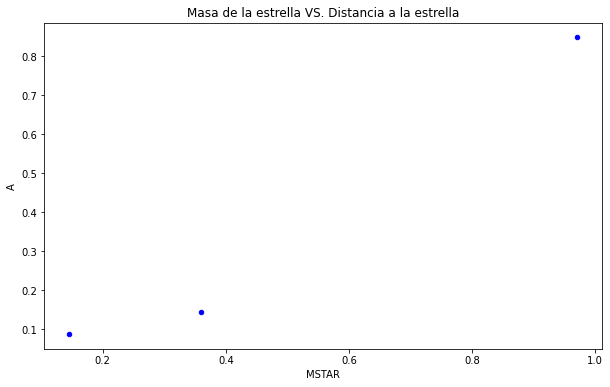

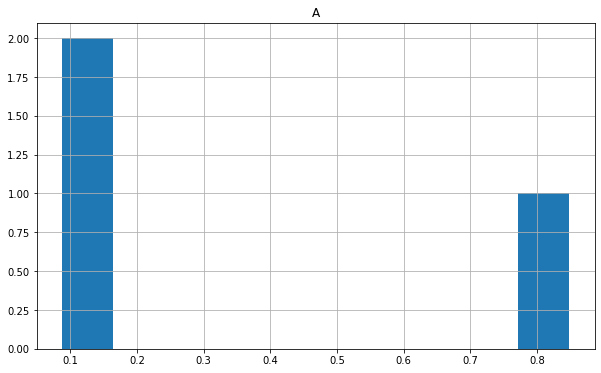

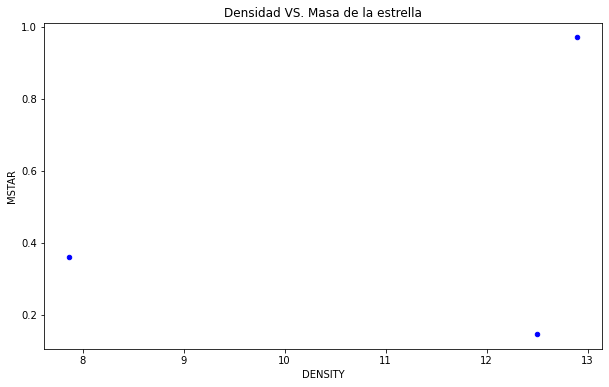

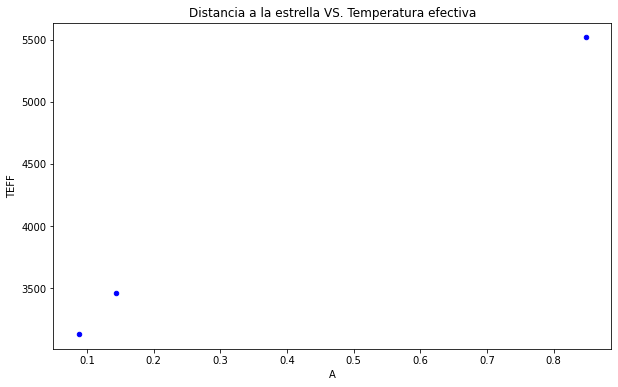

In [208]:
# Gráficas
datos.plot.scatter('MSTAR','A',color='blue', figsize = (10,6), title = 'Masa de la estrella VS. Distancia a la estrella')
datos.hist(column = 'A',figsize = (10,6))
datos.plot.scatter(x='DENSITY', y='MSTAR',color='blue',figsize = (10,6), title = 'Densidad VS. Masa de la estrella')
datos.plot.scatter(x='A', y='TEFF',color='blue',figsize = (10,6),title = 'Distancia a la estrella VS. Temperatura efectiva')
